# Exploratory data analysis for $D^0\to K^-\pi^+$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy.optimize import minimize

from pdflib import normal, double_normal, exp_gauss_exp, exp_double_gauss_exp
from llhlib import loglh_maker, normalize
from plotlib import poisson_hist, fit_plot, plot_scatter

In [2]:
import glob

In [3]:
matplotlib.rcParams['font.size'] = 14

In [4]:
files = sorted(glob.glob('./csv/*.csv'))
print('\n'.join(files))

./csv/taumuthr.csv
./csv/tup.csv
./csv/tupd0gamgam.csv
./csv/tupdbltau.csv
./csv/tupdpkpipi.csv
./csv/tupfulldkpidgg.csv


In [5]:
df = pd.read_csv(files[1])
df.shape

(73195, 39)

In [6]:
df.head()

,Unnamed: 0,evtn,D0_K_p,D0_pi_p,D0_K_pt,D0_pi_pt,D0_K_costh,D0_pi_costh,D0_K_E,D0_pi_E,...,D0_pi_px_mc,D0_K_py_mc,D0_pi_py_mc,D0_K_pz_mc,D0_pi_pz_mc,D0_K_pdgid_mc,D0_pi_pdgid_mc,M,p,pt
0,0,0,1.000537,0.759469,0.971618,0.730433,0.238686,-0.273867,1.115702,0.772187,...,-0.316860,0.935978,-0.657984,0.236210,-0.207945,-321.0,211.0,1.866122,0.285859,0.284192
1,1,0,0.759469,1.000537,0.730433,0.971618,-0.273867,0.238686,0.905820,1.010225,...,0.258061,-0.657984,0.935978,-0.207945,0.236210,211.0,-321.0,1.894601,0.285859,0.284192
2,2,1,0.970711,0.786824,0.766878,0.628596,-0.613085,0.601460,1.089035,0.799107,...,-0.413982,0.389501,-0.475053,-0.592966,0.472755,-321.0,211.0,1.866150,0.287341,0.260209
3,3,1,0.786824,0.970711,0.628596,0.766878,0.601460,-0.613085,0.928875,0.980694,...,0.658455,-0.475053,0.389501,0.472755,-0.592966,211.0,-321.0,1.887826,0.287341,0.260209
4,4,2,0.892681,0.848831,0.891397,0.843184,-0.053606,-0.115155,1.020096,0.860229,...,0.614984,0.407948,-0.575371,-0.048010,-0.097460,-211.0,321.0,1.858415,0.286211,0.246409


In [7]:
df.columns

Index(['Unnamed: 0', 'evtn', 'D0_K_p', 'D0_pi_p', 'D0_K_pt', 'D0_pi_pt',
       'D0_K_costh', 'D0_pi_costh', 'D0_K_E', 'D0_pi_E', 'D0_K_px', 'D0_pi_px',
       'D0_K_py', 'D0_pi_py', 'D0_K_pz', 'D0_pi_pz', 'D0_K_dedx', 'D0_pi_dedx',
       'D0_K_pidkpi', 'D0_pi_pidkpi', 'D0_K_pidkp', 'D0_pi_pidkp',
       'D0_K_pidmupi', 'D0_pi_pidmupi', 'D0_K_pide', 'D0_pi_pide',
       'D0_K_charge', 'D0_pi_charge', 'D0_K_px_mc', 'D0_pi_px_mc',
       'D0_K_py_mc', 'D0_pi_py_mc', 'D0_K_pz_mc', 'D0_pi_pz_mc',
       'D0_K_pdgid_mc', 'D0_pi_pdgid_mc', 'M', 'p', 'pt'],
      dtype='object')

In [8]:
dff = df[(np.abs(df.D0_K_pdgid_mc) == 321) & (np.abs(df.D0_pi_pdgid_mc) == 211)]
dff = dff[(dff.M > 1.85) & (dff.M < 1.88)]

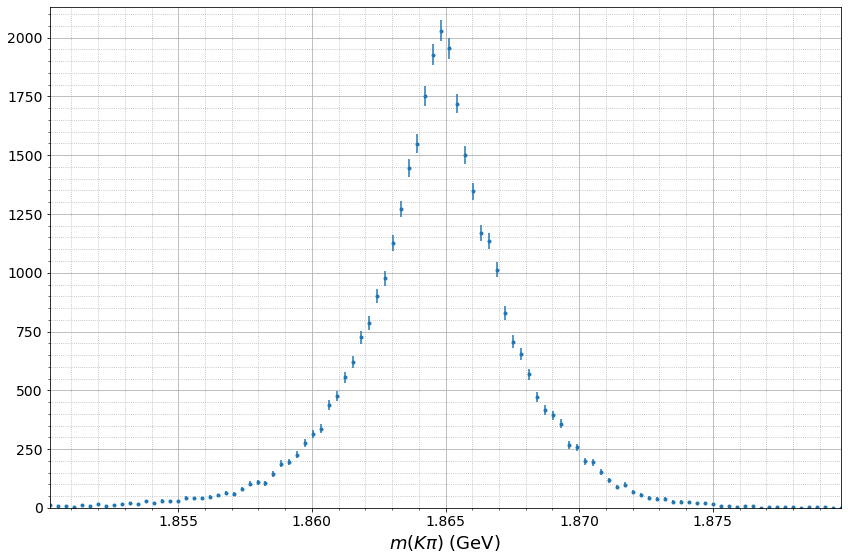

In [9]:
poisson_hist(dff.M, xlabel=r'$m(K\pi)$ (GeV)');

In [10]:
pdf1 = normalize(exp_double_gauss_exp, dff.M.min(), dff.M.max())
fcn1 = loglh_maker(pdf1, dff.M)

In [11]:
bounds1 = [(1.85, 1.87), (0.0001, 0.0015), (0.002, 0.010), (0.0, 1.0), (0.01, 5.00), (0.01, 5.00)]
fitres1 = minimize(fcn1, [1.865, 0.001, 0.003, 0.5, 1., 1.], bounds=bounds1)
fitres1.x

array([1.86480077e+00, 8.29759842e-04, 2.73911707e-03, 1.49794320e-01,
       1.23780364e+00, 1.54509816e+00])

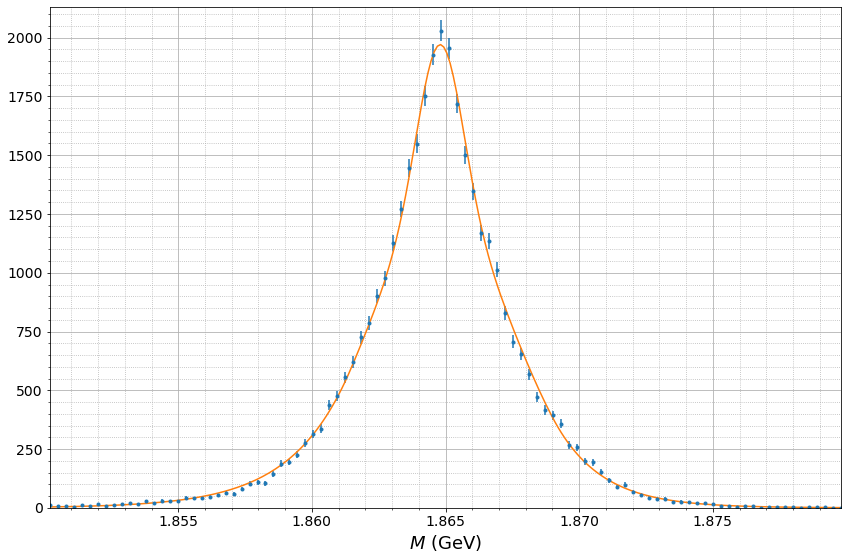

In [12]:
fit_plot(pdf1, fitres1.x, dff.M, xlabel=r'$M$ (GeV)');

In [13]:
pdf2 = normalize(exp_gauss_exp, dff.M.min(), dff.M.max())
fcn2 = loglh_maker(pdf2, dff.M)

In [14]:
bounds2 = [(1.85, 1.87), (0.0001, 0.006), (0.01, 5.00), (0.01, 5.00)]
fitres2 = minimize(fcn2, [1.865, 0.0009, 1., 1.], bounds=bounds2)
fitres2.x

array([1.86473717e+00, 1.63777627e-03, 7.57478388e-01, 7.57793282e-01])

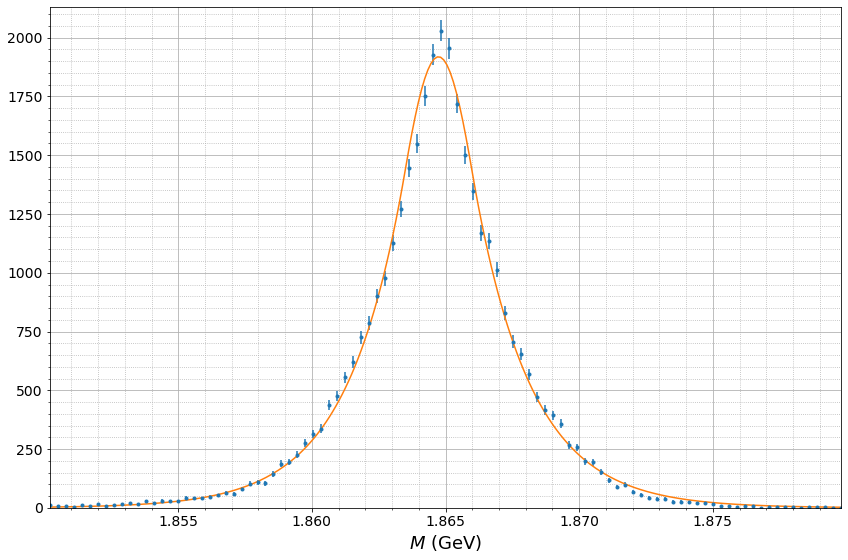

In [15]:
fit_plot(pdf2, fitres2.x, dff.M, xlabel=r'$M$ (GeV)');

## $M_{bc}$ and $\Delta E$

In [16]:
ebeam = 0.5 * 3.77313
dff['E'] = dff.D0_K_E + dff.D0_pi_E
dff['deltaE'] = dff.E - ebeam
dff['Mbc'] = np.sqrt(ebeam**2 - dff.p**2)

In [17]:
dff = dff[(dff.deltaE < 0.025) & (dff.Mbc > 1.86)]

In [18]:
dff[['M', 'Mbc']].describe()

,M,Mbc
count,35293.000000,35293.000000
mean,1.864654,1.864827
std,0.003046,0.000451
min,1.850040,1.861661
25%,1.863073,1.864581
50%,1.864756,1.864828
75%,1.866355,1.865072
max,1.879942,1.868027


In [19]:
pdf3 = normalize(exp_gauss_exp, dff.Mbc.min(), dff.Mbc.max())
fcn3 = loglh_maker(pdf3, dff.Mbc)

In [20]:
bounds3 = [(1.864, 1.866), (0.0002, 0.0009), (0.10, 5.00), (0.10, 5.00)]
fitres3 = minimize(fcn3, [1.86483, 0.0003, 1., 1.], bounds=bounds2)
fitres3.x

array([1.86482813e+00, 3.03254085e-04, 9.99810705e-01, 9.99810705e-01])

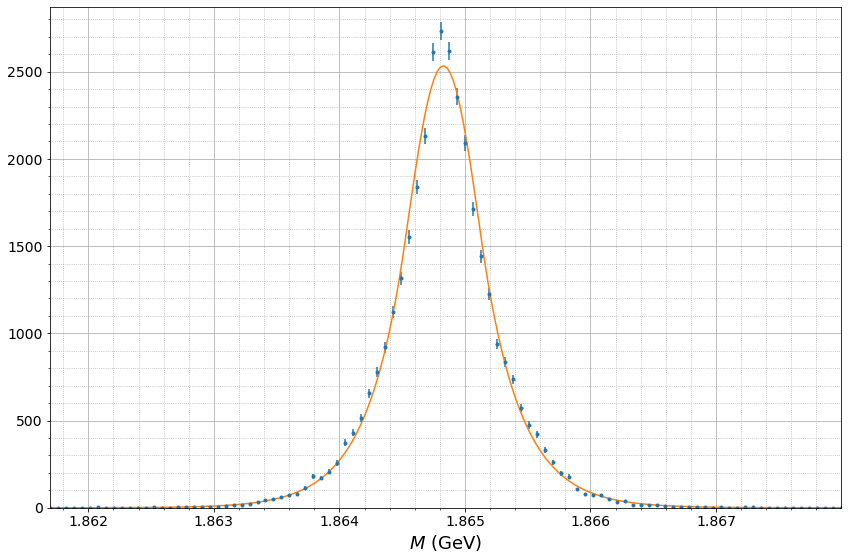

In [21]:
fit_plot(pdf3, fitres3.x, dff.Mbc, xlabel=r'$M$ (GeV)');

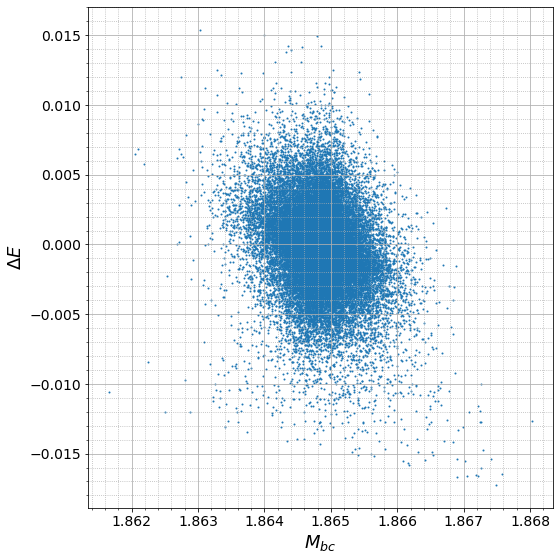

In [22]:
plot_scatter(dff.Mbc, dff.deltaE, r'$M_{bc}$', r'$\Delta E$');

In [23]:
fcn3 = loglh_maker(double_normal, dff.deltaE)
bounds3 = [(-0.02, 0.02), (0.0004, 0.003), (0.002, 0.010), (0.0, 1.0)]

In [24]:
fitres3 = minimize(fcn3, [0., 0.001, 0.004, 0.5], bounds=bounds3)
fitres3.x

array([-1.06611297e-04,  2.02720448e-03,  4.37721544e-03,  6.35334853e-01])

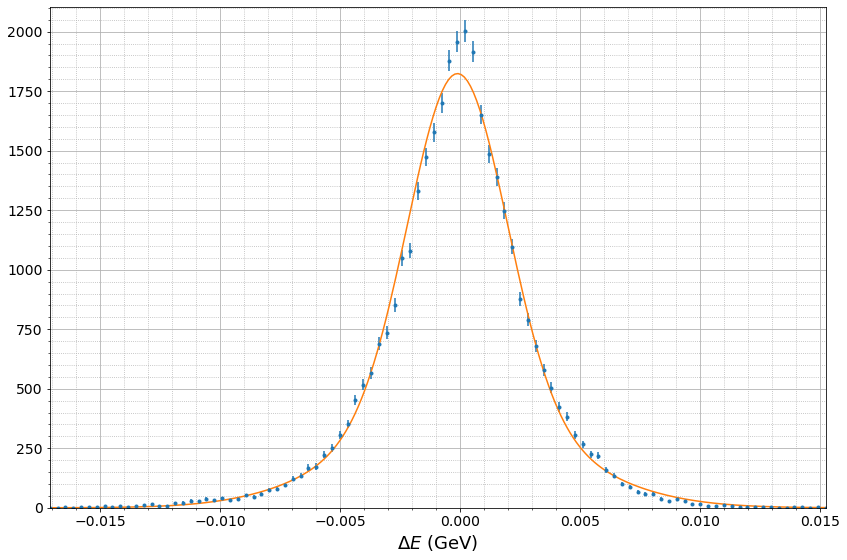

In [25]:
fit_plot(double_normal, fitres3.x, dff.deltaE, xlabel=r'$\Delta E$ (GeV)');

# PID

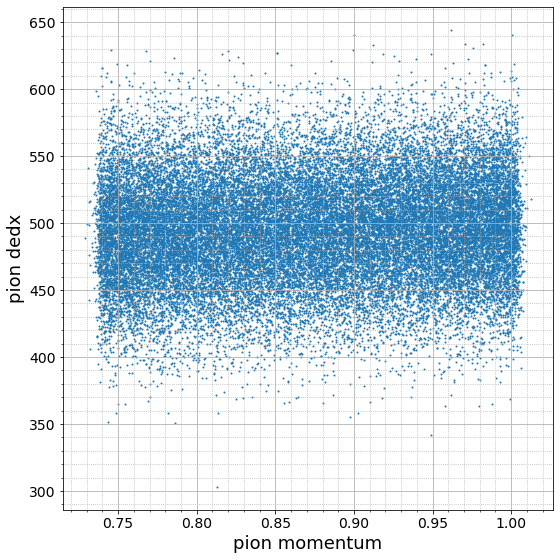

In [26]:
# poisson_hist(dff.D0_pi_dedx, xlabel='dedx');
plot_scatter(dff.D0_pi_p, dff.D0_pi_dedx, 'pion momentum', 'pion dedx');

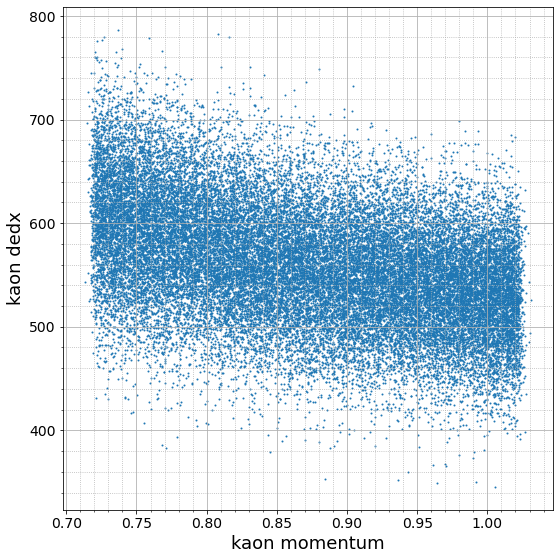

In [27]:
plot_scatter(dff.D0_K_p, dff.D0_K_dedx, 'kaon momentum', 'kaon dedx');

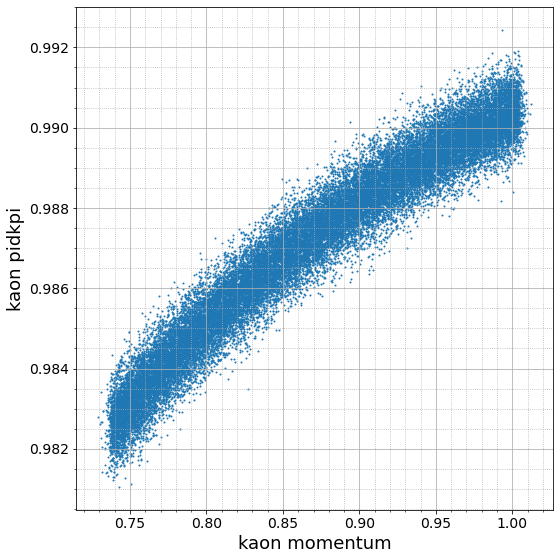

In [31]:
plot_scatter(dff.D0_pi_p, dff.D0_pi_pidkpi, 'kaon momentum', 'kaon pidkpi');

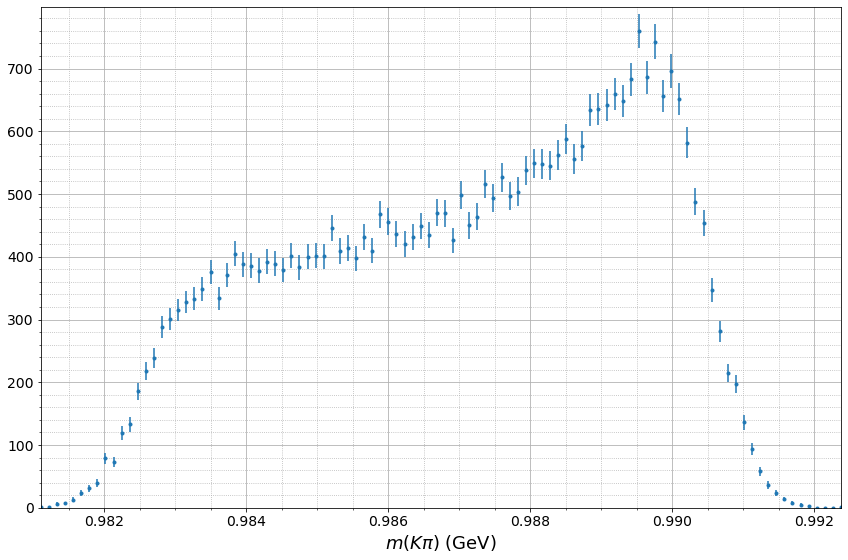

In [30]:
poisson_hist(dff.D0_pi_pidkpi[dff.D0_pi_pidkpi>0], xlabel=r'$m(K\pi)$ (GeV)');